# Dual color labeling of CTP11-13 one chr and long-range contacts

by Pu Zheng

2022.11.10



In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia

print(os.getpid())

# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

13704


In [2]:
import pandas as pd

<a id='0.2'></a>
## 0.2 Genome reference information

In [3]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')

print(f"-- reference_folder: {reference_folder}")

# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
if not os.path.exists(pool_folder):
    print(f"Create pool_folder: {pool_folder}")
    os.makedirs(pool_folder)
else:
    print(f"Use pool_folder: {pool_folder}")

-- reference_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl
Use pool_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain


# 1. Load selected regions

In [4]:
import ImageAnalysis3.library_tools.quality_check as check

In [5]:
library_folder = os.path.join(pool_folder, f'mouse_brain_long_contacts')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
else:
    print(f"Use library_folder: {library_folder}")

Use library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_long_contacts


In [6]:
sel_codebook_filename = os.path.join(library_folder, 'sel_contact_codebook.csv')
print(f"loading codebook from file: {sel_codebook_filename}")
sel_codebook = pd.read_csv(sel_codebook_filename)
sel_codebook

loading codebook from file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_long_contacts\sel_contact_codebook.csv


,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604,cell_type,chr_as_num
0,1:18740000-18760000,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1
1,1:36042487-36110247,1072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['MicroPVM', 'Oligo']",1
2,1:39053266-39116581,1074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,['L4_5_IT'],1
3,1:61240000-61260000,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1
4,1:68682949-68800249,1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,['Lamp5'],1
5,1:72583027-72630300,1094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['Sst'],1
6,1:78740000-78760000,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1
7,1:86240000-86260000,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1
8,1:89121460-89206528,1104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['L6_CT'],1
9,1:101240000-101260000,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1


## selected chr

In [8]:
sel_chr = '7'
print(sel_chr)

7



# Then load probe file to find these regions

In [11]:
from ImageAnalysis3 import library_tools
reload(library_tools)
reload(library_tools.design)

<module 'ImageAnalysis3.library_tools.design' from 'E:\\Users\\puzheng_new\\Documents\\Chromatin_Analysis_Scripts\\Library_design\\CTP-14-human_brain_genome\\..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\design.py'>

In [51]:
region_name_2_pb_id = {}

pb_dict = {}



In [52]:
ctp11_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\mouse_genome_1000'
ctp11_report_folder = os.path.join(ctp11_folder, 'reports')
ctp11_probe_filename = os.path.join(ctp11_report_folder, r'merged_probes.pbr')

print(ctp11_probe_filename)
# Parse segemented list
_ctp11_pbde = library_tools.design.pb_reports_class()
_ctp11_pbde.load_from_file(ctp11_probe_filename)

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\mouse_genome_1000\reports\merged_probes.pbr
- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\mouse_genome_1000\reports\merged_probes.pbr.
- loading cand_probes from file
- loading kept_probes from file
- 211283 filtered probes loaded
- loading sequence_dic from file
- loading map_dic from file
- loading params_dic from file
- loading check_dic from file
- loading save_file from file


True

In [53]:
# load blasted probes to screen out good pbs:
ctp11_records = []
with open(os.path.join(ctp11_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        ctp11_records.append(record)
print(len(ctp11_records))

# from blasted probes, generate region_name_2_pb_id
for _r in ctp11_records:
    _reg_name = _r.id.split('loc_')[1].split('_')[0]
    if _reg_name not in sel_codebook['name'].values and _reg_name.split(':')[0] != sel_chr:
        continue
    _pb_id = _r.id.split('pos_')[1].split('_')[0]
    if _reg_name not in region_name_2_pb_id:
        region_name_2_pb_id[_reg_name] = []
    # append
    region_name_2_pb_id[_reg_name].append(_pb_id)
print(len(region_name_2_pb_id))

114719
64


In [54]:
# append matched regions into pb_dict
for _s, _dict in _ctp11_pbde.kept_probes.items():
    _rname = _dict['name'].split('_strand')[0]
    if _rname not in sel_codebook['name'].values and _rname.split(':')[0] != sel_chr:
        continue
    else:
        if _rname not in pb_dict:
            pb_dict[_rname] = library_tools.design.pb_reports_class()
        # append if this probe exist
        if _rname not in region_name_2_pb_id or str(_dict['pb_index']) not in region_name_2_pb_id[_rname]:
            continue
        # change region id
        _rid = len(pb_dict)#sel_codebook.loc[sel_codebook['name']==_rname].index.values[0]
        _info_dict = {_k:_v for _k,_v in _dict.items()}
        _info_dict['reg_index'] = _rid
        _info_dict['reg_name'] = _info_dict['reg_name'].split('reg_')[0] + f"reg_{_rid}"
        _info_dict['name'] = _info_dict['reg_name'] + f"_pb_{_info_dict['pb_index']}"
        pb_dict[_rname].kept_probes[_s] = _info_dict
    #break
print(len(pb_dict))

70


In [36]:
# For ctp12, do the same:
ctp12_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-12_mop_markers\marker_gene_TSS'
ctp12_report_folder = os.path.join(ctp12_folder, 'reports')
ctp12_probe_filename = os.path.join(ctp12_report_folder, r'merged_probes.pbr')

print(ctp12_probe_filename)
# Parse segemented list
_ctp12_pbde = library_tools.design.pb_reports_class()
_ctp12_pbde.load_from_file(ctp12_probe_filename)

# load ctp12 records
# load blasted probes to screen out good pbs:
ctp12_records = []
with open(os.path.join(ctp12_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        ctp12_records.append(record)
print(len(ctp12_records))

for _r in ctp12_records:
    _reg_name = _r.id.split('loc_')[1].split('_')[0]
    if _reg_name not in sel_codebook['name'].values and _reg_name.split(':')[0] != sel_chr:
        continue
    _pb_id = _r.id.split('pos_')[1].split('_')[0]
    if _reg_name not in region_name_2_pb_id:
        region_name_2_pb_id[_reg_name] = []
    # append
    region_name_2_pb_id[_reg_name].append(_pb_id)
print(len(region_name_2_pb_id))

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-12_mop_markers\marker_gene_TSS\reports\merged_probes.pbr
- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-12_mop_markers\marker_gene_TSS\reports\merged_probes.pbr.
- loading cand_probes from file
- loading kept_probes from file
- 7835 filtered probes loaded
- loading sequence_dic from file
- loading map_dic from file
- loading params_dic from file
- loading check_dic from file
- loading save_file from file
3360
66


In [55]:
for _s, _dict in _ctp12_pbde.kept_probes.items():
    _rname = _dict['name'].split('_:')[0]
    if _rname not in sel_codebook['name'].values and _rname.split(':')[0] != sel_chr:
        continue
    else:
        if _rname not in pb_dict:
            pb_dict[_rname] = library_tools.design.pb_reports_class()
        # append if this probe exist
        if _rname not in region_name_2_pb_id or str(_dict['pb_index']) not in region_name_2_pb_id[_rname]:
            continue
        # change region id
        _rid = len(pb_dict)#sel_codebook.loc[sel_codebook['name']==_rname].index.values[0]
        _info_dict = {_k:_v for _k,_v in _dict.items()}
        _info_dict['reg_index'] = _rid
        _info_dict['reg_name'] = _info_dict['reg_name'].split('reg_')[0] + f"reg_{_rid}"
        _info_dict['name'] = _info_dict['reg_name'] + f"_pb_{_info_dict['pb_index']}"
        pb_dict[_rname].kept_probes[_s] = _info_dict
    #break
print(len(pb_dict))

72


In [56]:
# For CTP13, do the same:
ctp13_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_1000'
ctp13_report_folder = os.path.join(ctp13_folder, 'reports')

ctp13_pbde = library_tools.design.pb_reports_class()

for _i in range(1,5):

    ctp13_probe_filename = os.path.join(ctp13_report_folder, f'merged_probes_{_i}.pbr')

    print(ctp13_probe_filename)
    # Parse segemented list
    _pbde = library_tools.design.pb_reports_class()
    _pbde.load_from_file(ctp13_probe_filename)
    print(len(_pbde.kept_probes))
    ctp13_pbde.kept_probes.update(_pbde.kept_probes)
    print(len(ctp13_pbde.kept_probes))


\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_1000\reports\merged_probes_1.pbr
- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_1000\reports\merged_probes_1.pbr.
- loading cand_probes from file
- loading kept_probes from file
- 204220 filtered probes loaded
- loading sequence_dic from file
- loading map_dic from file
- loading params_dic from file
- loading check_dic from file
- loading save_file from file
204220
204220
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_1000\reports\merged_probes_2.pbr
- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_1000\reports\merged_probes_2.pbr.
- loading cand_probes from file
- loading kept_probes from file
- 205019 filtered probes loaded
- loading sequence_dic from file
- loading map_dic from file
- loading params_dic from file
- loading chec

In [57]:
# load ctp13 records

# load blasted probes to screen out good pbs:
ctp13_records = []
with open(os.path.join(ctp13_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        ctp13_records.append(record)
print(len(ctp13_records))

for _r in ctp13_records:
    _reg_name = _r.id.split('loc_')[1].split('_')[0]
    if _reg_name not in sel_codebook['name'].values:
        continue
    _pb_id = _r.id.split('pos_')[1].split('_')[0]
    if _reg_name not in region_name_2_pb_id:
        region_name_2_pb_id[_reg_name] = []
    # append
    region_name_2_pb_id[_reg_name].append(_pb_id)
print(len(region_name_2_pb_id))

115776
77


In [ ]:
for _s, _dict in _ctp13_pbde.kept_probes.items():
    _rname = _dict['name'].split('_:')[0]
    if _rname not in sel_codebook['name'].values and _rname.split(':')[0] != sel_chr:
        continue
    else:
        if _rname not in pb_dict:
            pb_dict[_rname] = library_tools.design.pb_reports_class()
        # append if this probe exist
        if _rname not in region_name_2_pb_id or str(_dict['pb_index']) not in region_name_2_pb_id[_rname]:
            continue
        # change region id
        _rid = len(pb_dict)#sel_codebook.loc[sel_codebook['name']==_rname].index.values[0]
        _info_dict = {_k:_v for _k,_v in _dict.items()}
        _info_dict['reg_index'] = _rid
        _info_dict['reg_name'] = _info_dict['reg_name'].split('reg_')[0] + f"reg_{_rid}"
        _info_dict['name'] = _info_dict['reg_name'] + f"_pb_{_info_dict['pb_index']}"
        pb_dict[_rname].kept_probes[_s] = _info_dict
    #break
print(len(pb_dict))

In [158]:
# save this probe dict
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
# save 
overwrite_report = True
report_dict_filename = os.path.join(report_folder, 'reg_2_report.pkl')
if not os.path.exists(report_dict_filename) or overwrite_report:
    print(f"saving report dict to file: {report_dict_filename}")
    pickle.dump(pb_dict, open(report_dict_filename, 'wb'))

saving report dict to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_long_contacts\reports\reg_2_report.pkl


## No filtering is required. Directly go to assembly

<a id='3'></a>
# 3. Load and asssemble probes

<a id='3.1'></a>
## 3.1 design readout mapping dict (region_to_readout)

This part is a simple 2 color sequential

In [159]:
# remove a bad region
del pb_dict['13:114065922-114149764']

In [160]:
region_2_readout_dict = {}
for _i, _reg in enumerate(pb_dict):
    region_2_readout_dict[_reg] = [f"u{_i}", f"u{_i+len(pb_dict)}"]
print(region_2_readout_dict)

{'1:18740000-18760000': ['u0', 'u28'], '1:61240000-61260000': ['u1', 'u29'], '1:78740000-78760000': ['u2', 'u30'], '1:86240000-86260000': ['u3', 'u31'], '1:101240000-101260000': ['u4', 'u32'], '1:106240000-106260000': ['u5', 'u33'], '1:141240000-141260000': ['u6', 'u34'], '1:151240000-151260000': ['u7', 'u35'], '3:13740000-13760000': ['u8', 'u36'], '4:26240000-26260000': ['u9', 'u37'], '7:43740000-43760000': ['u10', 'u38'], '10:103740000-103760000': ['u11', 'u39'], '11:6240000-6260000': ['u12', 'u40'], '14:91240000-91260000': ['u13', 'u41'], '17:61240000-61260000': ['u14', 'u42'], '18:11240000-11260000': ['u15', 'u43'], '1:36042487-36110247': ['u16', 'u44'], '1:39053266-39116581': ['u17', 'u45'], '1:68682949-68800249': ['u18', 'u46'], '1:72583027-72630300': ['u19', 'u47'], '1:89121460-89206528': ['u20', 'u48'], '2:161757252-161819816': ['u21', 'u49'], '5:44189271-44278791': ['u22', 'u50'], '6:41494636-41570746': ['u23', 'u51'], '8:76990149-77104743': ['u24', 'u52'], '9:50054571-5016054

<a id='3.2'></a>
## 3.2 loading components

### primers
pick primer set 16,15

In [161]:
from ImageAnalysis3 import library_tools
primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Primers'
primers = library_tools.assemble.load_primers([16,15], _primer_folder=primer_folder)

- Picked primer: ID: W1B05_primer_16
Name: W1B05_primer_16
Description: W1B05_primer_16
Number of features: 0
Seq('CGGGTTTCGTTGCGCACACC')
- Picked primer: ID: W1B04_primer_15
Name: W1B04_primer_15
Description: W1B04_primer_15
Number of features: 0
Seq('TAATACGACTCACTATAGGGCTTGTGCATCGCGCCAAAGA')


## Load readouts

In [162]:
# collect types from region_2_readout_dict
readout_usage_by_type = {}
for _region, _infos in region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in readout_usage_by_type:
            readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in readout_usage_by_type[_info[0]]:
            readout_usage_by_type[_info[0]].append(int(_info[1:]))

readout_usage_dict = {_type:len(_v) for _type,_v in readout_usage_by_type.items()}

### Readout usage, same as ctp11

In [163]:
from ImageAnalysis3.classes import _allowed_kwds

readout_dict ={}
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets'


# unique
readout_type = 'unique'
# 
_type_char = _allowed_kwds[readout_type]
_readout_start = 0
_num_color = 2

readout_dict[_type_char] = library_tools.assemble.load_readouts(readout_usage_dict[_type_char], 
                                                       _type='highest_snr_after_630', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=_num_color, # 750,647,561
                                                       _start_id=_readout_start,
                                                       )

In [164]:
# save
readout_usage_file = os.path.join(library_folder, 'readout_usage.pkl')
if not os.path.isfile(readout_usage_file) or overwrite_readout_usage:
    print(f'save to file: {readout_usage_file}')
    pickle.dump(readout_dict, open(readout_usage_file, 'wb'))

save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_long_contacts\readout_usage.pkl


<a id='3.3'></a>
## 3.3 assemble probes

In [165]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

# params
assemble_params = {
    'primer_len':20,
    'num_readout_per_probe':4, 
}


In [166]:
# run assembly
cand_probes, readout_summary = Assemble_probes(library_folder, pb_dict, 
                                               region_2_readout_dict, readout_dict, primers, 
                                               primer_len=assemble_params['primer_len'], 
                                               num_readout_per_probe=assemble_params['num_readout_per_probe'], 
                                               unique_readout_per_probe=True,
                                               rc_targets=False, overwrite=True)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['u']
--- assemblying 120 probes in region: 1:18740000-18760000
--- assemblying 120 probes in region: 1:61240000-61260000
--- assemblying 120 probes in region: 1:78740000-78760000
--- assemblying 120 probes in region: 1:86240000-86260000
--- assemblying 120 probes in region: 1:101240000-101260000
--- assemblying 89 probes in region: 1:106240000-106260000
--- assemblying 110 probes in region: 1:141240000-141260000
--- assemblying 120 probes in region: 1:151240000-151260000
--- assemblying 120 probes in region: 3:13740000-13760000
--- assemblying 104 probes in region: 4:26240000-26260000
--- assemblying 119 probes in region: 7:43740000-43760000
--- assemblying 78 probes in region: 10:103740000-103760000
--- assemblying 120 probes in region: 11:6240000-6260000
--- assemblying 120 probes in region: 14:91240000-91260000
--- assemblying 120 probes in region: 17:61240000-61260000
--- assemblying 120 

# 4.Check quality


## 4.1 Load probes

Checking procedures could restart from here

In [167]:
# folder for this library
# candidate full-length probe filename
candidate_basename = 'candidate_probes.fasta' # old version
# load full probes
full_records = []
with open(os.path.join(library_folder, candidate_basename), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        full_records.append(record)

print(f"Total probe loaded: {len(full_records)}")

Total probe loaded: 3260


### Manually input the following info to double check!

In [168]:
from ImageAnalysis3 import library_tools

num_readout_per_probe = 4
primer_len=20
target_len=42
min_num_probes = 40
# merfish related
num_on_bits = 2 ### Manually input the following info to double check!

primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Primers'
primers = library_tools.assemble.load_primers([16,15], _primer_folder=primer_folder)

- Picked primer: ID: W1B05_primer_16
Name: W1B05_primer_16
Description: W1B05_primer_16
Number of features: 0
Seq('CGGGTTTCGTTGCGCACACC')
- Picked primer: ID: W1B04_primer_15
Name: W1B04_primer_15
Description: W1B04_primer_15
Number of features: 0
Seq('TAATACGACTCACTATAGGGCTTGTGCATCGCGCCAAAGA')


### 4.1.1 check primer usage

In [169]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
primer_check = check._check_primer_usage(full_records, primers[0], primers[1], primer_len=primer_len)
print(primer_check)

-- Checking primer usage, total probes: 3260
True


### 4.1.2 check region probe number

In [170]:
reload(check)
reg_size_dic, len_check = check._check_region_size(full_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: 0 -> 120
gene: 3 -> 120
gene: 6 -> 120
gene: 7 -> 120
gene: 9 -> 120
gene: 10 -> 89
gene: 11 -> 110
gene: 12 -> 120
gene: 14 -> 120
gene: 15 -> 104
gene: 18 -> 119
gene: 21 -> 78
gene: 22 -> 120
gene: 25 -> 120
gene: 27 -> 120
gene: 28 -> 120
gene: 1 -> 120
gene: 2 -> 120
gene: 4 -> 120
gene: 5 -> 120
gene: 8 -> 120
gene: 13 -> 120
gene: 16 -> 120
gene: 17 -> 120
gene: 19 -> 120
gene: 20 -> 120
gene: 23 -> 120
gene: 26 -> 120
True


### 4.1.3 check readout usage for each gene

In [171]:
reload(check)
check_readout_dict = pickle.load(open(os.path.join(library_folder, 'readout_usage.pkl'), 'rb'))

reg_readout_dic, reg2readout_check = check._check_region_to_readouts(full_records, check_readout_dict, 
                                                                     total_readout_num=num_on_bits)
print(reg2readout_check)

0 -> ['NDB_784', 'NDB_901']
3 -> ['NDB_755', 'NDB_773']
6 -> ['NDB_826', 'NDB_868']
7 -> ['NDB_713', 'NDB_812']
9 -> ['NDB_865', 'NDB_1027']
10 -> ['NDB_725', 'NDB_716']
11 -> ['NDB_817', 'NDB_754']
12 -> ['NDB_710', 'NDB_860']
14 -> ['NDB_652', 'NDB_856']
15 -> ['NDB_971', 'NDB_680']
18 -> ['NDB_718', 'NDB_634']
21 -> ['NDB_743', 'NDB_737']
22 -> ['NDB_847', 'NDB_715']
25 -> ['NDB_683', 'NDB_698']
27 -> ['NDB_643', 'NDB_883']
28 -> ['NDB_815', 'NDB_863']
1 -> ['NDB_760', 'NDB_1033']
2 -> ['NDB_965', 'NDB_878']
4 -> ['NDB_790', 'NDB_631']
5 -> ['NDB_917', 'NDB_758']
8 -> ['NDB_778', 'NDB_1075']
13 -> ['NDB_728', 'NDB_653']
16 -> ['NDB_844', 'NDB_1060']
17 -> ['NDB_974', 'NDB_905']
19 -> ['NDB_961', 'NDB_805']
20 -> ['NDB_746', 'NDB_866']
23 -> ['NDB_661', 'NDB_730']
26 -> ['NDB_875', 'NDB_887']
True


### 4.1.4 check readout usage in the library

In [172]:
reload(check)
readout_reg_dic, readout2reg_check = check._check_readout_to_region(reg_readout_dic, full_records, 
                                                                    check_readout_dict, primer_len=primer_len, 
                                                                    target_len=target_len,
                                                                    probe_readout_num=num_readout_per_probe)
print(readout2reg_check)

-- extracting probes from >region:0, region:3, region:6, region:7, region:9, region:10, region:11, region:12, region:14, region:15, region:18, region:21, region:22, region:25, region:27, region:28, region:1, region:2, region:4, region:5, region:8, region:13, region:16, region:17, region:19, region:20, region:23, region:26, {'NDB_784': ['0', '0', '0', '0'], 'NDB_901': ['0', '0', '0', '0'], 'NDB_755': ['3', '3', '3', '3'], 'NDB_773': ['3', '3', '3', '3'], 'NDB_826': ['6', '6', '6', '6'], 'NDB_868': ['6', '6', '6', '6'], 'NDB_713': ['7', '7', '7', '7'], 'NDB_812': ['7', '7', '7', '7'], 'NDB_865': ['9', '9', '9', '9'], 'NDB_1027': ['9', '9', '9', '9'], 'NDB_725': ['10', '10', '10', '10'], 'NDB_716': ['10', '10', '10', '10'], 'NDB_817': ['11', '11', '11', '11'], 'NDB_754': ['11', '11', '11', '11'], 'NDB_710': ['12', '12', '12', '12'], 'NDB_860': ['12', '12', '12', '12'], 'NDB_652': ['14', '14', '14', '14'], 'NDB_856': ['14', '14', '14', '14'], 'NDB_971': ['15', '15', '15', '15'], 'NDB_680':

### 4.1.5 check bewteen probes

In [173]:
# construct internal map
reload(check)
int_map = check._construct_internal_map(full_records, library_folder, save=False) 

In [174]:
# internal check probes
readout_count_dic, readout_count_check = check._check_readout_in_probes(readout_reg_dic, reg_size_dic, int_map, readout_dict)
print(readout_count_check)

True


In [175]:
# check between probes
kept_records, removed_count = check._check_between_probes(full_records, int_map, 
                                                          primer_len=primer_len, 
                                                          target_len=target_len)

-- total probes removed by internal screening: 0


In [176]:
# clear memory
del(int_map)

### 4.1.6 finish checking, save

In [177]:
print(len(kept_records), len(cand_probes))

3260 3260


In [178]:
# save kept records
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(kept_records, output_handle, "fasta")

## 4.2 BLAST screening of probes

create the local blast database by:
```bash
makeblastdb -in C:\Users\puzheng\Documents\Tools\lowercase_masked\Mus_musculus.GRCm38.dna_sm.merged.fa -dbtype nucl -parse_seqids -out GRCm38_ensembl -title "Mouse chromosomes soft masked" -blastdb_version 4![image.png](attachment:image.png)
```

The outputs are:
```bash
Building a new DB, current time: 03/30/2021 21:49:18
New DB name:   C:\Users\puzheng\Documents\Tools\GRCm38_ensembl
New DB title:  Mouse chromosomes soft masked
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 66 sequences in 42.2668 seconds.
```

In [179]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)

<module 'ImageAnalysis3.library_tools.quality_check' from 'E:\\Users\\puzheng_new\\Documents\\Chromatin_Analysis_Scripts\\Library_design\\CTP-14-human_brain_genome\\..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\quality_check.py'>

In [180]:
if 'kept_records' not in locals() or len(kept_records) == 0:
    kept_records = []
    with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'r') as handle:
        for record in SeqIO.parse(handle, "fasta"):
            kept_records.append(record)
print(len(kept_records))

3260


In [182]:
blast_database = os.path.join(reference_folder, 'blast_database', 'GRCm38_ensembl')

check.Blast_probes(kept_records, library_folder, num_threads=44, 
                   blast_db=blast_database, blast_evalue=100, overwrite=True)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\blast_database\GRCm38_ensembl
-- number of probes loaded: 3260
-- processing region: 0 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_long_contacts\blast\probe_gene_0.fasta
--- *blasting region: 0
--- total time for blast 0: 8.923s.
-- processing region: 1 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_long_contacts\blast\probe_gene_1.fasta
--- *blasting region: 1
--- total time for blast 1: 5.635s.
-- processing region: 10 with 89 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_long_contacts\blast\probe_gene_10.fasta
--- *blasting region: 10
--- total time for blast 10: 4.662s.
-- processing region: 11 with 110 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

### 4.2.1 screen probe by blast results

This step has 2 different cutoffs:

hard_cutoff: whether a probe has any ~40mer hit somewhere else, if so just dump the probe

soft_cutoff: whether a probe has a lot of ~20mer off-target hits, if exceed certain amount then dump the probe

In [183]:
# screen
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
num_probes_per_region = 120
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = \
    check.Screening_Probes_by_Blast(
        library_folder, 
        num_probes_per_region,
        hard_thres=target_len,
        soft_count_th=50,
        )

- Number of probes loaded: 3260
- Number of regions in this library: 28
-- checking probes in region: 0
--- number of probes: 120 , kept by blast: 120 , if remove dups: 120
--- remove duplicated probes
-- number of probes kept for this region: 120
-- checking probes in region: 3
--- gene=3, id=59 removed by soft count = 155
--- number of probes: 120 , kept by blast: 119 , if remove dups: 119
--- remove duplicated probes
-- number of probes kept for this region: 119
-- checking probes in region: 6
--- gene=6, id=82 removed by soft count = 104
--- number of probes: 120 , kept by blast: 119 , if remove dups: 119
--- remove duplicated probes
-- number of probes kept for this region: 119
-- checking probes in region: 7
--- number of probes: 120 , kept by blast: 120 , if remove dups: 120
--- remove duplicated probes
-- number of probes kept for this region: 120
-- checking probes in region: 9
--- gene=9, id=4 removed by soft count = 59
--- number of probes: 120 , kept by blast: 119 , if remo

# 5. Summary Table and plots

In [184]:
blasted_records = []
with open(os.path.join(library_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        blasted_records.append(record)
print(len(blasted_records))

3244


In [185]:
import re

region_info_dict = {
    'gene_name':[],
    'locus_info':[],
    'chr':[],
    #'chr_order':[],
    'num_probes':[],
    'readouts': [],
    #'type':[],
}

probe_name_re_string = r'loc_(?P<loc>.+)_gene_(?P<gene>.+)_pb_(?P<pb>[0-9]+)_pos_(?P<pos>[0-9]+)(.+)_readouts_\[(?P<readouts>.+?)\]_primers_\[(?P<fwd_primers>.+?),(?P<rev_primers>.+?)\]'

for _pb in blasted_records:
    
    _match = re.match(probe_name_re_string, _pb.id, )
    # append all if not exist
    if _match.groupdict()['gene'] not in region_info_dict['gene_name']:
        # append new
        region_info_dict['gene_name'].append(_match.groupdict()['gene'])
        region_info_dict['locus_info'].append(_match.groupdict()['loc'])
        region_info_dict['chr'].append(_match.groupdict()['loc'].split(':')[0])
        region_info_dict['num_probes'].append(1)
        region_info_dict['readouts'].append(list(np.unique(_match.groupdict()['readouts'].split(','))))
    else:
        _ind = region_info_dict['gene_name'].index(_match.groupdict()['gene'])
        region_info_dict['num_probes'][_ind] += 1
        for _rd in np.unique(_match.groupdict()['readouts'].split(',')):
            if _rd not in region_info_dict['readouts'][_ind]:
                region_info_dict['readouts'][_ind].append(_rd)
        
    #break

In [186]:
region_info_df = pd.DataFrame(region_info_dict)
region_info_df

,gene_name,locus_info,chr,num_probes,readouts
0,0,1:18740000-18760000,1,120,"[NDB_784_u, NDB_901_u]"
1,3,1:61240000-61260000,1,119,"[NDB_755_u, NDB_773_u]"
2,6,1:78740000-78760000,1,119,"[NDB_826_u, NDB_868_u]"
3,7,1:86240000-86260000,1,120,"[NDB_713_u, NDB_812_u]"
4,9,1:101240000-101260000,1,119,"[NDB_865_u, NDB_1027_u]"
5,10,1:106240000-106260000,1,88,"[NDB_725_u, NDB_716_u]"
6,11,1:141240000-141260000,1,109,"[NDB_817_u, NDB_754_u]"
7,12,1:151240000-151260000,1,119,"[NDB_710_u, NDB_860_u]"
8,14,3:13740000-13760000,3,120,"[NDB_652_u, NDB_856_u]"
9,15,4:26240000-26260000,4,101,"[NDB_680_u, NDB_971_u]"


In [188]:
# Add additional information
_types = []
for _g in region_info_df['locus_info']:
    if '000' in _g:
        _types.append('CTP11')
    else:
        _types.append('CTP13')
# add to this df
region_info_df['type'] = _types

region_info_df['chr_order'] = -1
for _chr in np.unique(region_info_df['chr']):
    _reg_starts = [int(_info.split(':')[1].split('-')[0])
                   for _info in region_info_df.loc[region_info_df['chr']==_chr,
                                                   'locus_info']
                  ]
    _reg_orders = np.array(_reg_starts).argsort().argsort().astype(np.int32)
    region_info_df.loc[region_info_df['chr']==_chr,'chr_order'] = _reg_orders

In [189]:
region_info_df

,gene_name,locus_info,chr,num_probes,readouts,type,chr_order
0,0,1:18740000-18760000,1,120,"[NDB_784_u, NDB_901_u]",CTP11,0
1,3,1:61240000-61260000,1,119,"[NDB_755_u, NDB_773_u]",CTP11,3
2,6,1:78740000-78760000,1,119,"[NDB_826_u, NDB_868_u]",CTP11,6
3,7,1:86240000-86260000,1,120,"[NDB_713_u, NDB_812_u]",CTP11,7
4,9,1:101240000-101260000,1,119,"[NDB_865_u, NDB_1027_u]",CTP11,9
5,10,1:106240000-106260000,1,88,"[NDB_725_u, NDB_716_u]",CTP11,10
6,11,1:141240000-141260000,1,109,"[NDB_817_u, NDB_754_u]",CTP11,11
7,12,1:151240000-151260000,1,119,"[NDB_710_u, NDB_860_u]",CTP11,12
8,14,3:13740000-13760000,3,120,"[NDB_652_u, NDB_856_u]",CTP11,0
9,15,4:26240000-26260000,4,101,"[NDB_680_u, NDB_971_u]",CTP11,0


In [190]:
overwrite_region_info = True
region_info_filename = os.path.join(library_folder, r'summary_region_info.csv')

if not os.path.exists(region_info_filename) or overwrite_region_info:
    print(f"saving region info to file: {region_info_filename}")
    region_info_df.to_csv(region_info_filename, index=False)

saving region info to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_long_contacts\summary_region_info.csv


## Generate summary plots

In [191]:
import ImageAnalysis3.library_tools.quality_check as check
# get region size dict
min_num_probes = 50
reg_size_dic, len_check = check._check_region_size(blasted_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: 0 -> 120
gene: 3 -> 119
gene: 6 -> 119
gene: 7 -> 120
gene: 9 -> 119
gene: 10 -> 88
gene: 11 -> 109
gene: 12 -> 119
gene: 14 -> 120
gene: 15 -> 101
gene: 18 -> 118
gene: 21 -> 78
gene: 22 -> 119
gene: 25 -> 119
gene: 27 -> 120
gene: 28 -> 120
gene: 1 -> 120
gene: 2 -> 120
gene: 4 -> 120
gene: 5 -> 120
gene: 8 -> 120
gene: 13 -> 118
gene: 16 -> 120
gene: 17 -> 120
gene: 19 -> 119
gene: 20 -> 119
gene: 23 -> 120
gene: 26 -> 120
True


## number of probes in each region

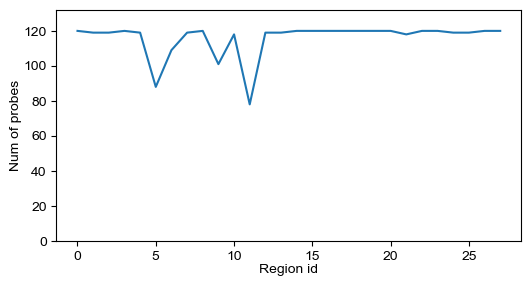

In [192]:
# Plot number of probes per region
plt.figure(figsize=(6,3), dpi=100)
plt.plot(list(reg_size_dic.values()))
## number and location on each chr#plt.plot(np.ones(len(pb_nums))*20)
plt.ylabel(f"Num of probes", labelpad=1)
plt.xlabel(f"Region id", labelpad=1)
plt.ylim([0, np.max(list(reg_size_dic.values()))*1.1])
plt.savefig(os.path.join(report_folder, 'afterblast_nProbes_per_region.png'), transparent=True, dpi=300)
plt.show()

## number and location on each chr

In [193]:
chrs = []
chr_2_centers = {}
chr_2_types = {}
for _loc_name, _type in zip(region_info_df['locus_info'], region_info_df['type']):
    _chr = _loc_name.split(':')[0]
    _start, _end = _loc_name.split(':')[1].split('-')
    _center = (int(_start)+int(_end))/2
    if _chr not in chrs:
        chrs.append(_chr)
    # create
    if _chr not in chr_2_centers:
        chr_2_centers[_chr] = []
        chr_2_types[_chr] = []
    # append
    if _center not in chr_2_centers[_chr]:
        chr_2_centers[_chr].append(_center)
        chr_2_types[_chr].append(_type)
# region number
chr_2_region_num = {_chr:len(cts) for _chr, cts in chr_2_centers.items()}

In [195]:
# Load chromosome sizes
import pandas as pd
from ImageAnalysis3.structure_tools.distance import sort_chr

sorted_chrs = sorted(chrs, key=lambda _c: sort_chr(_c))

chrom_size_df = pd.read_csv(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\mm10.chrom.sizes',
            delimiter='\t', header=None)

chr_2_len = {}
for _chr in chrs:
    chr_2_len[_chr] = chrom_size_df.loc[chrom_size_df[0]==f'chr{_chr}', 1].values[0]


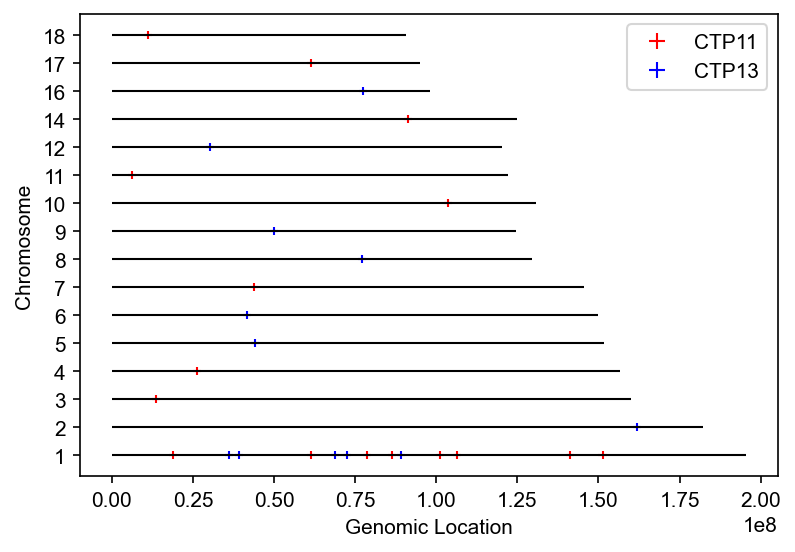

In [197]:
%matplotlib inline
color_map = {
    'CTP11':'red',
    'CTP13':'blue',
}
#plt.style.use('dark_background')
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(6,4),dpi=150)
for _i, _chr in enumerate(sorted_chrs):
    ax.hlines(_i, 0, chr_2_len[_chr], color='black', linewidth=1)
    ax.scatter(chr_2_centers[_chr], 
               np.ones(len(chr_2_centers[_chr]))* _i, 
               marker='+', linewidth=1,
               s=15, c=[color_map[_t] for _t in chr_2_types[_chr]],
               )
# create legend patch
legend_element = [Line2D([0],[0], color=[0,0,0,0], 
                         label=_type, marker='+', markersize=8,
                         markeredgecolor=_c, markerfacecolor=_c,)
                  for _type,_c in color_map.items()]
ax.legend(handles=legend_element)
ax.set_yticks(np.arange(len(sorted_chrs)))
ax.set_yticklabels(sorted_chrs)
#ax.set_xlim([0, chr_2_len['1']])
ax.set_xlabel("Genomic Location")
ax.set_ylabel("Chromosome")
#ax.legend([_sc])
plt.savefig(os.path.join(report_folder, 'target_location_summary.png'), 
            dpi=300, transparent=True)
plt.show()

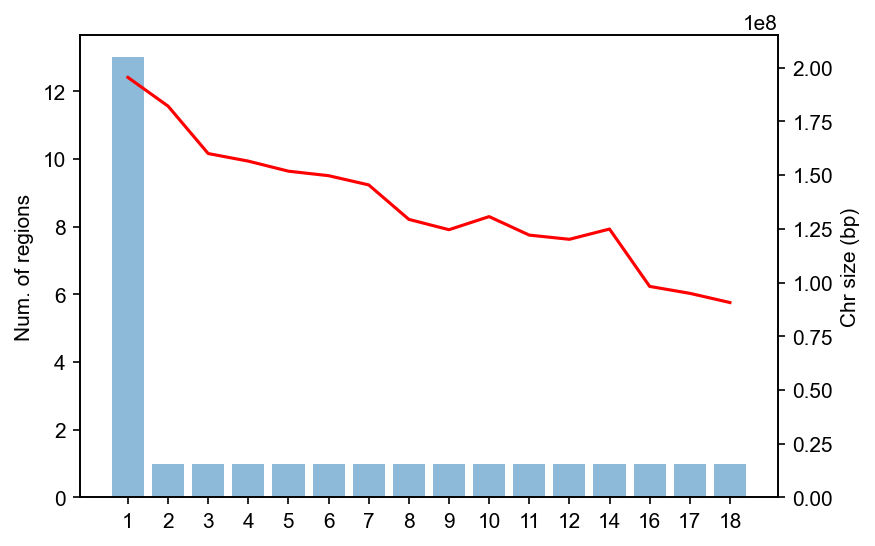

In [198]:
fig, ax1 = plt.subplots(figsize=(6,4),dpi=150)
ax2 = ax1.twinx()
_bar_p = ax1.bar(sorted_chrs, 
                 [chr_2_region_num[_c] for _c in sorted_chrs], alpha=0.5)
ax1.set_ylabel("Num. of regions")
ax2.plot(sorted_chrs, [chr_2_len[_c] for _c in sorted_chrs], color='r')
ax2.set_ylim([0, np.max(list(chr_2_len.values()))*1.1])
ax2.set_ylabel("Chr size (bp)")
plt.savefig(os.path.join(report_folder, 'target_chr_stat_summary.png'), 
            dpi=300, transparent=True)
plt.show()